In [7]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [6]:
df = pd.read_csv('./donnees_temperature_simulees.csv')

data = df['Température'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

look_back = 72
train_generator = TimeseriesGenerator(data_normalized, data_normalized,
                                      length=look_back, batch_size=32)


In [8]:
model = Sequential([
    LSTM(50, input_shape=(look_back, 1)),  # 50 unités LSTM
    Dense(1)  # Couche de sortie prédit la température future
])

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(train_generator, epochs=20, verbose=1)


Epoch 1/20
 22/272 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0817

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0194
Epoch 2/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
Epoch 3/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042
Epoch 4/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
Epoch 5/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0043
Epoch 6/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0045
Epoch 7/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0044
Epoch 8/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
Epoch 9/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
Epoch 10/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
Epoch 11/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0048
Epoch 12/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042
Epoch 13/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0044
Epoch 14/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0044
Epoch 15/20
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0042


In [15]:

test_generator = TimeseriesGenerator(data_normalized, data_normalized,
									 length=look_back, batch_size=1)
predictions_normalized = model.predict(test_generator)
predictions = scaler.inverse_transform(predictions_normalized)

   1/8688 ━━━━━━━━━━━━━━━━━━━━ 2:07 15ms/step

 144/8688 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step

/opt/homebrew/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8688/8688 ━━━━━━━━━━━━━━━━━━━━ 8s 918us/step


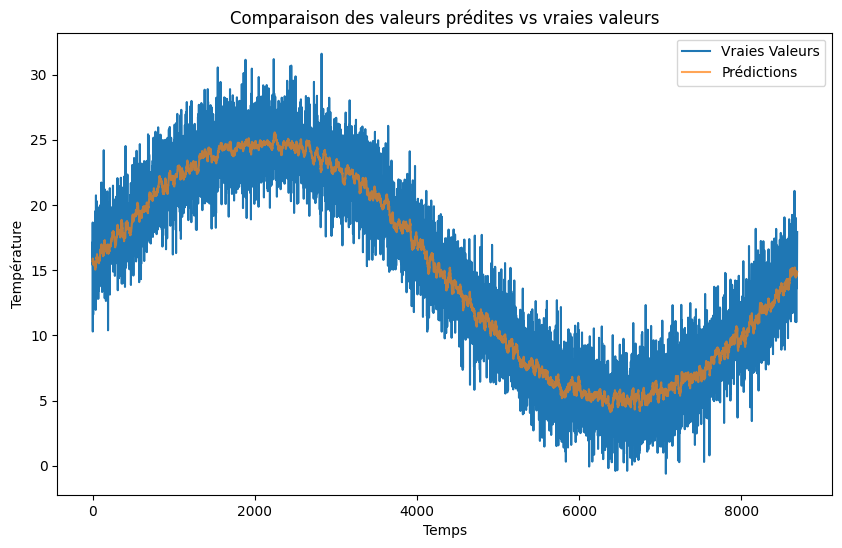

In [17]:
import matplotlib.pyplot as plt

vraies_valeurs = data[look_back:]

plt.figure(figsize=(10, 6))
plt.plot(vraies_valeurs, label='Vraies Valeurs')
plt.plot(predictions, label='Prédictions', alpha=0.7)
plt.title('Comparaison des valeurs prédites vs vraies valeurs')
plt.xlabel('Temps')
plt.ylabel('Température')
plt.legend()
plt.show()